# CONFIG

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
sys.path.append('../src')  # Adjust based on your actual structure
from config import DATA_DIR
import pandas as pd

import dataframe_report as dr
import performance_plot as pp

# Evaluation

## Claim vs No Claim - Zip Code Stratified

In [42]:
claim_23_uw_22Q4_filepath = os.path.join(DATA_DIR, 'datasets/output/rci_claim_23_uw_22Q4.csv')
balanced_merged_df = pd.read_csv(claim_23_uw_22Q4_filepath,
                                dtype={'UW_ZIP': str})

In [10]:
addresses = balanced_merged_df['address'].to_list()

# Evaluation

In [11]:
# change the list columns to string
def contains_non_hashable(column):
    for item in column:
        if isinstance(item, (list, dict, set)):
            return True
    return False
for col in balanced_merged_df.columns:
    if contains_non_hashable(balanced_merged_df[col]):
        print(f"Column '{col}' contains non-hashable types.")
        balanced_merged_df[col] = balanced_merged_df[col].apply(lambda x: str(x) if isinstance(x, list) else x)

# change the bool columns to int
for col in balanced_merged_df.columns:
    # Check if the column is of boolean type
    if balanced_merged_df[col].dtype == 'bool':
        # Convert the boolean column to integer
        balanced_merged_df[col] = balanced_merged_df[col].astype(int)
        print(f"Column '{col}' converted from bool to int.")


Column 'run_completed' converted from bool to int.
Column 'claim_2023' converted from bool to int.


In [12]:
stats_df = dr.create_stats_df(balanced_merged_df)

/opt/conda/envs/settleassist/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/envs/settleassist/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [13]:
stats_df

,type,count,null_percentage,top_values,unique_values,mean,median,25th percentile,75th percentile,std,min,max
UW_CITY,Categorical,3578,0.00,"{'PLANO': 210, 'ALLEN': 172, 'AURORA': 76, 'OK...",718,N/A,N/A,N/A,N/A,N/A,N/A,N/A
UW_DATE,Categorical,3578,0.00,"{'2022-10-11 00:15:06': 11, '2022-10-11 00:08:...",3350,N/A,N/A,N/A,N/A,N/A,N/A,N/A
UW_NUMBER,Numeric,3578,0.00,"{4759793228: 11, 4759728065: 8, 4804977786: 4,...",3400,4808128853.29,4810429670.0,4775945209.25,4840926123.0,35650171.24,4746012211,4869397018
UW_STATE,Categorical,3578,0.00,"{'TX': 1228, 'CO': 254, 'IL': 226, 'OK': 196, ...",43,N/A,N/A,N/A,N/A,N/A,N/A,N/A
UW_STREET,Categorical,3578,0.00,"{'2835 E FILLMORE ST': 11, '3036 E GARFIELD ST...",3400,N/A,N/A,N/A,N/A,N/A,N/A,N/A
UW_ZIP,Categorical,3578,0.00,"{'75025': 132, '75013': 110, '75002': 70, '750...",1046,N/A,N/A,N/A,N/A,N/A,N/A,N/A
address,Categorical,3578,0.00,"{'2835 E FILLMORE ST, PHOENIX, AZ 85008': 11, ...",3400,N/A,N/A,N/A,N/A,N/A,N/A,N/A
ageOfRoof_age,Numeric,3578,0.00,"{7.0: 553, 8.0: 460, 5.0: 360, 6.0: 349, 3.0: ...",27,6.72,7.0,4.0,8.0,4.18,0.0,26.0
ageOfRoof_confidence,Categorical,3578,0.00,"{'Medium Modeled': 2672, 'High': 801, 'High Mo...",5,N/A,N/A,N/A,N/A,N/A,N/A,N/A
claim_2023,Numeric,3578,0.00,"{1: 1798, 0: 1780}",2,0.5,1.0,0.0,1.0,0.5,0,1


In [14]:
balanced_merged_df.columns

Index(['address', 'run_completed', 'run_status_code', 'historicalRoofPermits',
       'trackingId', 'propertyCharacteristics_totalLivingArea',
       'propertyCharacteristics_totalLivingAreaSource',
       'propertyCharacteristics_yearBuilt',
       'propertyCharacteristics_yearBuiltSource',
       'propertyCharacteristics_propertyConstructionType',
       'propertyCharacteristics_propertyConstructionTypeSource',
       'propertyCharacteristics_roofReconstructionCostEstimateWODebrisRemoval',
       'propertyCharacteristics_roofReconstructionCostEstimateWithDebrisRemoval',
       'propertyCharacteristics_currentRoofValueEstimateWODebrisRemoval',
       'propertyCharacteristics_currentRoofValueEstimateWithDebrisRemoval',
       'ageOfRoof_age', 'ageOfRoof_confidence', 'roofCharacteristics_areaSqft',
       'roofCharacteristics_areaSqftConfidence',
       'roofCharacteristics_solarPanels',
       'roofCharacteristics_solarPanelConfidence',
       'roofCharacteristics_shapes', 'roofCharact

In [15]:
pd.set_option('display.max_columns', 100)
balanced_merged_df.head()

,address,run_completed,run_status_code,historicalRoofPermits,trackingId,propertyCharacteristics_totalLivingArea,propertyCharacteristics_totalLivingAreaSource,propertyCharacteristics_yearBuilt,propertyCharacteristics_yearBuiltSource,propertyCharacteristics_propertyConstructionType,propertyCharacteristics_propertyConstructionTypeSource,propertyCharacteristics_roofReconstructionCostEstimateWODebrisRemoval,propertyCharacteristics_roofReconstructionCostEstimateWithDebrisRemoval,propertyCharacteristics_currentRoofValueEstimateWODebrisRemoval,propertyCharacteristics_currentRoofValueEstimateWithDebrisRemoval,ageOfRoof_age,ageOfRoof_confidence,roofCharacteristics_areaSqft,roofCharacteristics_areaSqftConfidence,roofCharacteristics_solarPanels,roofCharacteristics_solarPanelConfidence,roofCharacteristics_shapes,roofCharacteristics_materials,roofCharacteristics_roofConditions,weatherVerification_numberOfHailEventsGTE1InchLT2Inches,weatherVerification_numberOfHailEventsGTE2Inches,weatherVerification_hailRiskScore,weatherVerification_numberOfWindSpeedEventsGT45Mph,weatherVerification_numberOfWindSpeedEventsGT60Mph,weatherVerification_numberOfWindSpeedEventsGT80Mph,location_standardizedAddress,location_matchCode,location_latitude,location_longitude,location_inputAddress,roofConditionInsightsScore_riskScore,roofConditionInsightsScore_riskDescription,score_v1.0,score_v1.1,key_triggers,score_boundary_v1,score_boundary_v2,historicalRoofPermits_totalCount,historicalRoofPermits_permits,UW_DATE,UW_NUMBER,UW_STREET,UW_CITY,UW_STATE,UW_ZIP,full_address,claim_number,claim_row_count,claim_count,first_date,last_date,claim_2023
0,"5542 DOWNS WAY, LITHONIA, GA 30058",1,200,NaN,NaN,1411.0,InterChange,1989.0,InterChange,"Siding, Wood (100%)",Default,9473.0,10893.0,5494.0,6318.0,7.0,Medium Modeled,1528.0,97.0,NaN,NaN,"[{'type': 'Gable', 'confidence': 95}]","[{'type': 'Shingle', 'confidence': 97}]",[],0.0,0.0,0.0,0.0,4.0,0.0,5542 DOWNS WAY LITHONIA GA 30058,A0000,33.729822,-84.162864,5542 DOWNS WAY LITHONIA GA 30058,1.0,LOW,1.0,4.5,['Wind speed >60'],lower_bound,NaN,NaN,NaN,2022-11-15 00:41:40,4810400458,5542 DOWNS WAY,LITHONIA,GA,30058,"5542 DOWNS WAY, LITHONIA, GA 30058",711680579.0,1.0,1.0,2023-04-27 10:54:00,2023-04-27 10:54:00,1
1,"2633 COUNCIL ST, LITHONIA, GA 30058",1,200,NaN,NaN,1060.0,InterChange,1900.0,InterChange,"Siding, Wood (100%)",Default,10367.0,11922.0,5390.0,6199.0,8.0,Medium Modeled,2714.0,97.0,NaN,NaN,"[{'type': 'Gable', 'confidence': 95}]","[{'type': 'Shingle', 'confidence': 97}]","[{'condition': 'Tree overhang', 'confidenceSco...",1.0,0.0,2.0,0.0,5.0,0.0,2633 COUNCIL ST LITHONIA GA 30058,A0000,33.708495,-84.104594,2633 COUNCIL ST LITHONIA GA 30058,1.0,LOW,1.0,5.5,"['Tree Overhang', 'Wind speed >60']",NaN,NaN,NaN,NaN,2022-12-14 00:14:21,4848080689,2633 COUNCIL ST,LITHONIA,GA,30058,"2633 COUNCIL ST, LITHONIA, GA 30058",705006187.0,2.0,1.0,2023-03-20 22:48:00,2023-03-20 22:48:00,1
2,"5727 MISTY RIDGE CT, LITHONIA, GA 30058",1,200,NaN,NaN,1804.0,InterChange,1986.0,InterChange,"Siding, Wood (100%)",Default,8322.0,9570.0,4826.0,5550.0,7.0,Medium Modeled,1532.0,92.0,NaN,NaN,"[{'type': 'Gable', 'confidence': 82}]","[{'type': 'Shingle', 'confidence': 97}]","[{'condition': 'Tree overhang', 'confidenceSco...",0.0,0.0,0.0,0.0,4.0,0.0,5727 MISTY RIDGE CT LITHONIA GA 30058,A0000,33.741899,-84.154944,5727 MISTY RIDGE CT LITHONIA GA 30058,1.0,LOW,1.0,5.5,"['Tree Overhang', 'Wind speed >60']",NaN,NaN,NaN,NaN,2022-12-15 00:26:07,4849797721,5727 MISTY RIDGE CT,LITHONIA,GA,30058,"5727 MISTY RIDGE CT, LITHONIA, GA 30058",NaN,NaN,NaN,NaN,NaN,0
3,"1989 LOWN FARM TRL, LITHONIA, GA 30058",1,200,NaN,NaN,2157.0,InterChange,1988.0,InterChange,"Siding, Wood (100%)",Default,14369.0,16524.0,7471.0,8592.0,8.0,Medium Modeled,2966.0,98.0,NaN,NaN,"[{'type': 'Gable', 'confidence': 71}, {'type':...","[{'type': 'Shingle', 'confidence': 99}]","[{'condition': 'Tile/Shingle Staining', 'confi...",0.0,0.0,0.0,0.0,4.0,0.0,1989 LOWN FARM TRL LITHONIA GA 30058,A0000,33.731023,-84.141

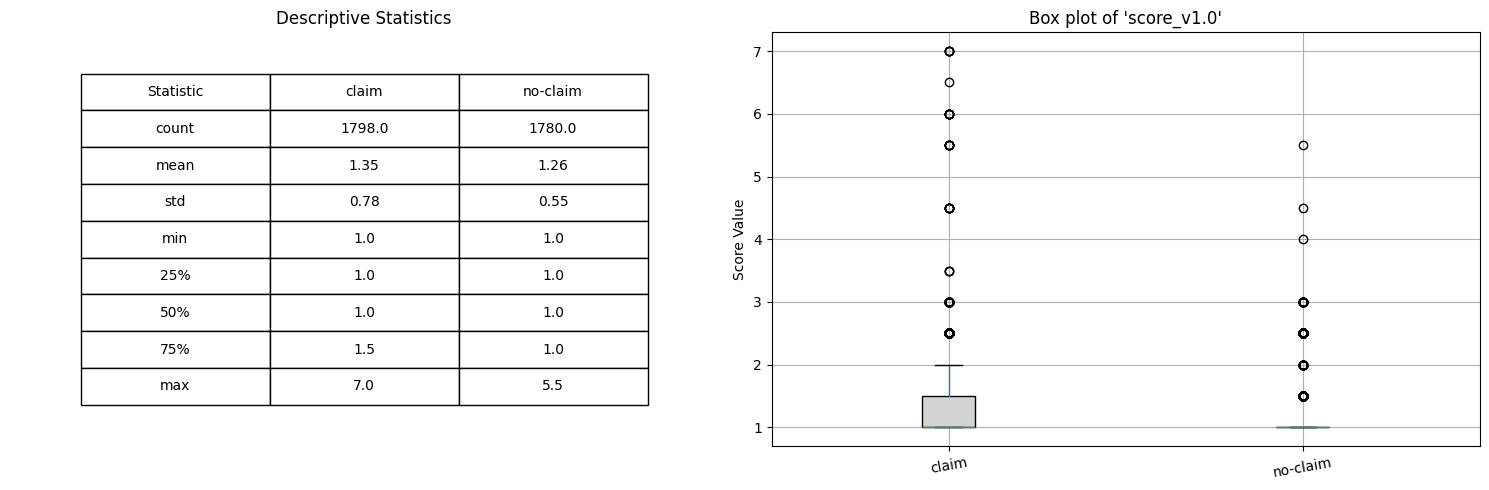

In [16]:
df_claim = balanced_merged_df[balanced_merged_df['claim_2023'] == True]
df_no_claim = balanced_merged_df[balanced_merged_df['claim_2023'] == False]

dr.compare_score_distributions([df_claim, df_no_claim], 
                            score_column='score_v1.0', labels=['claim', 'no-claim'], colors=None)


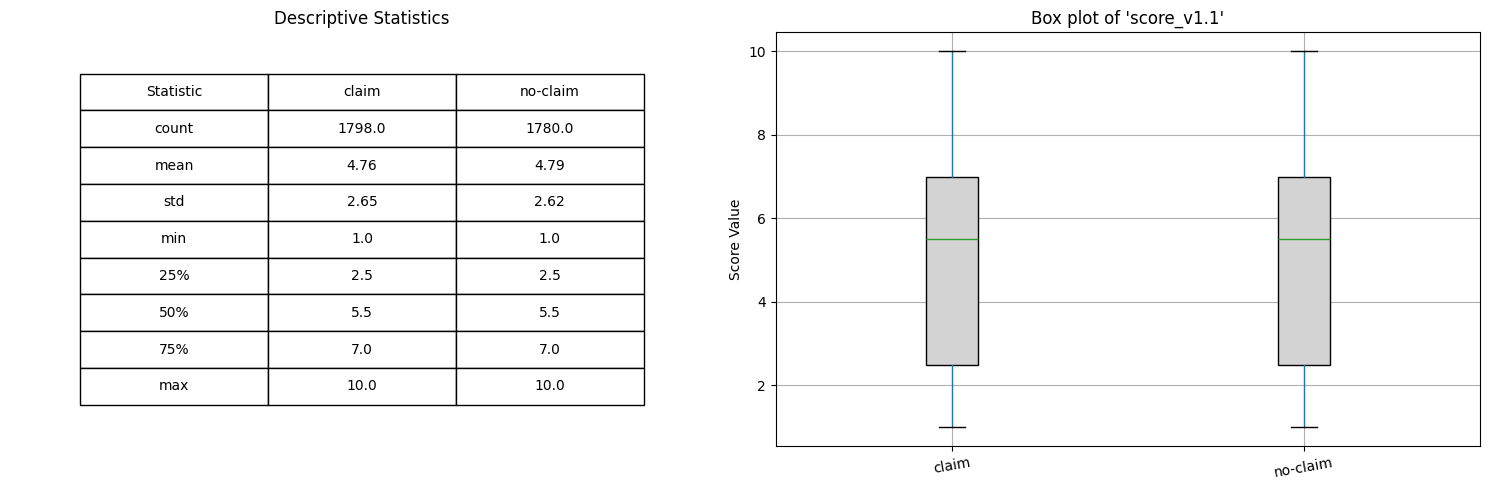

In [17]:
dr.compare_score_distributions([df_claim, df_no_claim], 
                            score_column='score_v1.1', labels=['claim', 'no-claim'], colors=None)

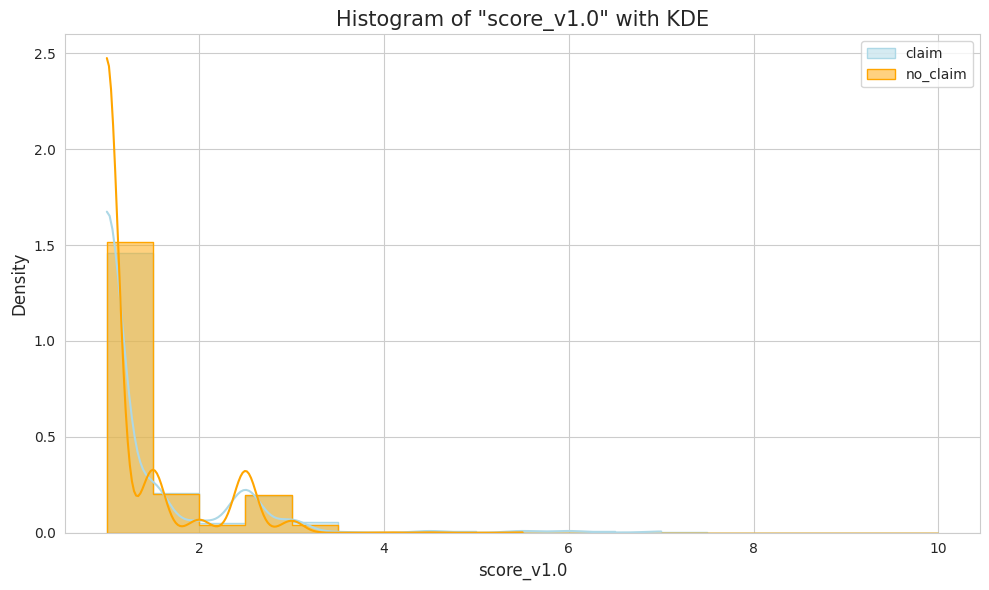

In [35]:
dr.plot_histograms(dataframes=[df_claim, df_no_claim], 
                   column_name='score_v1.0', 
                   labels=['claim', 'no_claim'], xrange=(1,10), bins=18)

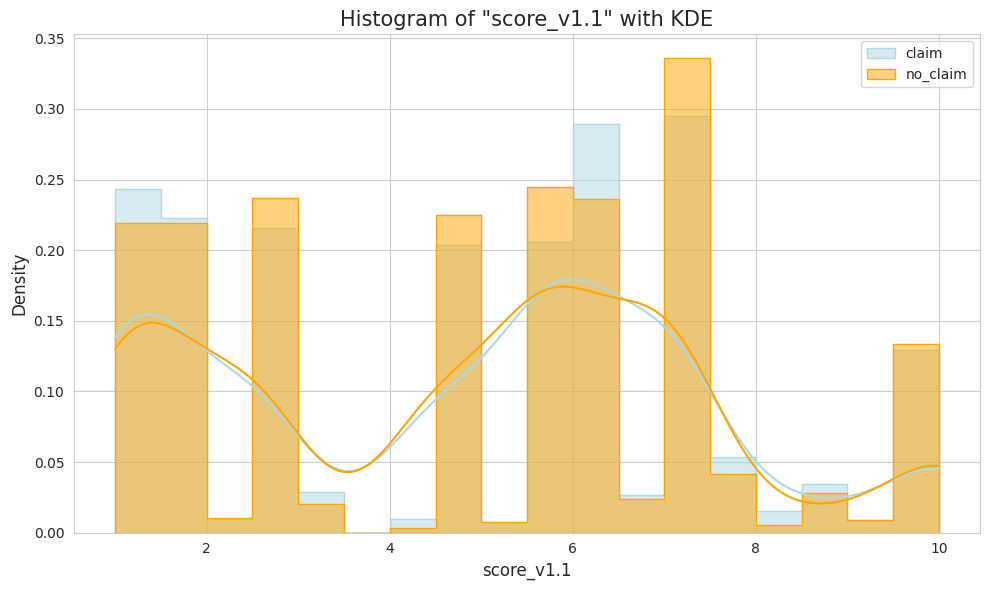

In [34]:
dr.plot_histograms(dataframes=[df_claim, df_no_claim], 
                   column_name='score_v1.1', 
                   labels=['claim', 'no_claim'], xrange=(1,10), bins=18)

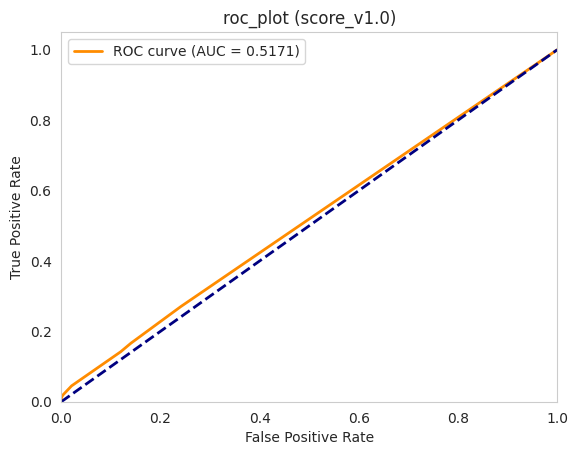

Gini stat: 0.0342


<Axes: title={'center': 'roc_plot (score_v1.0)'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [36]:
pp.plot_roc_curve(balanced_merged_df,
                  score='score_v1.0', 
                  plot_name='roc_plot (score_v1.0)', 
                  label='claim_2023', 
                  save=False)

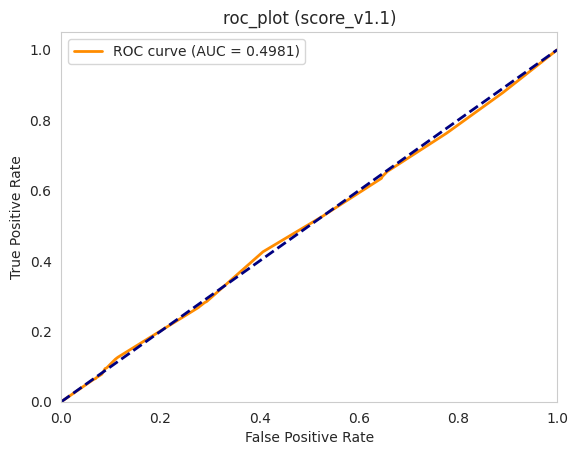

Gini stat: -0.0037


<Axes: title={'center': 'roc_plot (score_v1.1)'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [37]:
pp.plot_roc_curve(balanced_merged_df,
                  score='score_v1.1', 
                  plot_name='roc_plot (score_v1.1)', 
                  label='claim_2023', 
                  save=False)

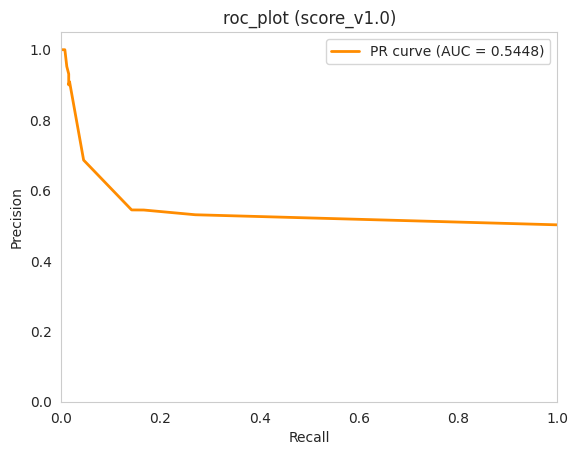

PR AUC: 0.5448


<Axes: title={'center': 'roc_plot (score_v1.0)'}, xlabel='Recall', ylabel='Precision'>

In [38]:
pp.plot_precision_recall_curve(balanced_merged_df,
                  score='score_v1.0', 
                  plot_name='roc_plot (score_v1.0)', 
                  label='claim_2023', 
                  save=False)

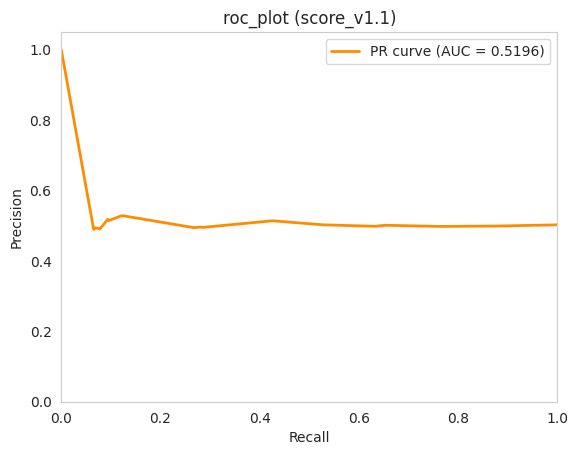

PR AUC: 0.5196


<Axes: title={'center': 'roc_plot (score_v1.1)'}, xlabel='Recall', ylabel='Precision'>

In [39]:
pp.plot_precision_recall_curve(balanced_merged_df,
                  score='score_v1.1', 
                  plot_name='roc_plot (score_v1.1)', 
                  label='claim_2023', 
                  save=False)

In [40]:
pp.calculate_gains_and_fprs(balanced_merged_df,
                  score_col='score_v1.0', 
                  target='claim_2023', 
                segment_list=[1, 5, 10, 15, 20])

,Top Population %,Target Captured %,FP / TP
0,1,1.7,0.13 (0.99)
1,5,6.3,0.56 (0.99)
2,10,11.2,0.77 (0.99)
3,15,16.4,0.82 (0.99)
4,20,21.1,0.88 (0.99)


In [41]:
pp.calculate_gains_and_fprs(balanced_merged_df,
                  score_col='score_v1.1', 
                  target='claim_2023', 
                segment_list=[1, 5, 10, 15, 20])

,Top Population %,Target Captured %,FP / TP
0,1,0.9,1.19 (0.99)
1,5,4.8,1.07 (0.99)
2,10,10.3,0.92 (0.99)
3,15,15.3,0.95 (0.99)
4,20,19.8,1.01 (0.99)
